# 21기 KNN 정규세션 과제

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ToBigs/05. KNN&Clustering/과제/KNN/blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. Preprocssing / EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [ ]:
df.isna().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

In [ ]:
df.shape

(4998, 12)

df의 데이터가 총 4998개인 상황에서 Product_Category_2 & 3 모두 결측치 값이 큰 것 같아 확인

In [ ]:
print(df['Product_Category_2'].value_counts().sort_index())
print(df['Product_Category_3'].value_counts().sort_index())

2.0     448
3.0      35
4.0     246
5.0     258
6.0     148
7.0       7
8.0     588
9.0      65
10.0     30
11.0    110
12.0     40
13.0    102
14.0    496
15.0    345
16.0    392
17.0    132
18.0     23
Name: Product_Category_2, dtype: int64
3.0       1
4.0      17
5.0     140
6.0      44
8.0     116
9.0     105
10.0     23
11.0     22
12.0     96
13.0     50
14.0    162
15.0    260
16.0    318
17.0    146
18.0     44
Name: Product_Category_3, dtype: int64


평균, 최빈값으로 채우기에는 숫자가 카테고리를 나타내기에 삭제하기로 결정

In [ ]:
del_col = ['Product_Category_2', 'Product_Category_3']
print("결측치 제거 전 shape", df.shape)
df = df.drop(del_col, axis=1)
print("결측치 제거 후 shape", df.shape)

결측치 제거 전 shape (4998, 12)
결측치 제거 후 shape (4998, 10)


In [ ]:
df.duplicated().sum() # 중복 없음 확인

0

Numerical Value 확인

In [ ]:
## num
num_col = df.select_dtypes(exclude= object).columns.tolist()
for each_col in num_col:
  print(f"============ {each_col} =============")
  each_unique = df[each_col]
  if df[each_col].nunique() < 30:
    print(df[each_col].value_counts())
  else:
    #print("too many unique values")
    print("total unique num count:", df[each_col].nunique())

============ User_ID =============
total unique num count: 2656
============ Occupation =============
4     706
0     572
7     535
1     460
17    339
12    305
20    285
2     251
14    245
16    244
6     186
3     160
15    133
10    122
5      98
11     95
19     73
13     65
18     56
9      50
8      18
Name: Occupation, dtype: int64
============ Marital_Status =============
0    2892
1    2106
Name: Marital_Status, dtype: int64
============ Product_Category_1 =============
5     1407
1     1285
8      995
2      227
11     206
3      193
6      193
4      107
16      78
15      57
13      43
10      41
7       40
12      31
20      31
19      20
14      19
18      18
17       6
9        1
Name: Product_Category_1, dtype: int64
============ Purchase =============
total unique num count: 3736


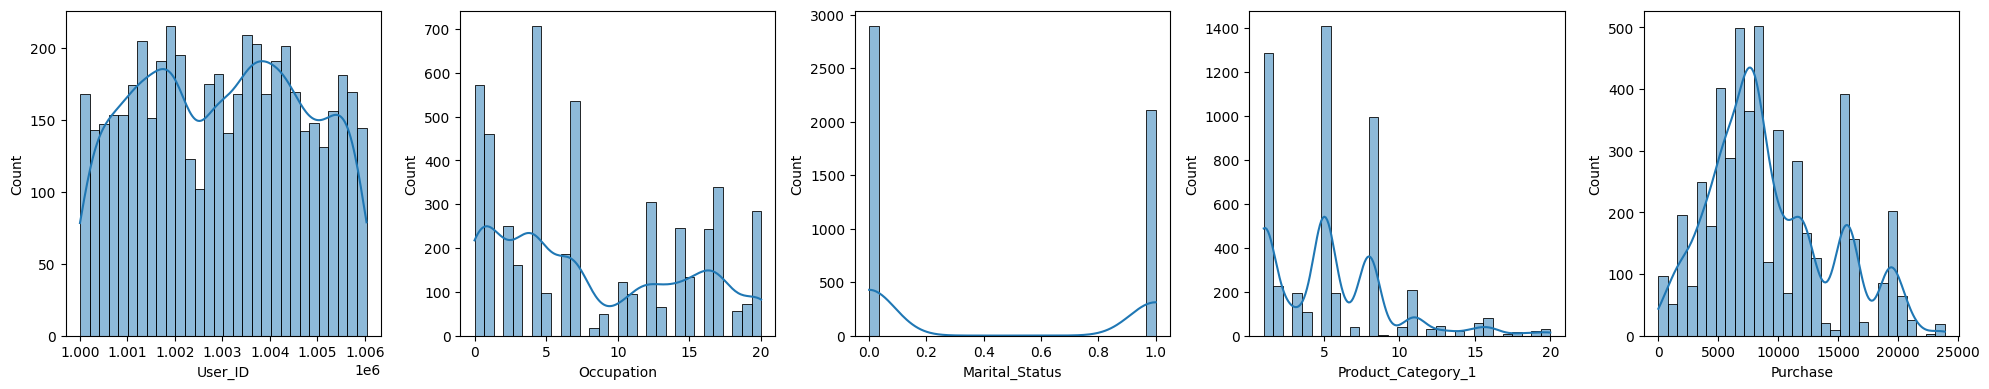

In [ ]:
#print(num_col)
fig, axes = plt.subplots(nrows=1, ncols=len(num_col), figsize=(20, 4))

for ax, col in zip(axes, num_col):
    sns.histplot(data = df[col], bins=30, kde=True, ax=ax)
plt.tight_layout()
plt.show()

Category values 각각 확인

In [ ]:
## cat
cat_col = df.select_dtypes(include = 'object').columns.tolist()
for each_col in cat_col:
  target = df[each_col]
  print("==========")
  print(each_col)
  print(target.nunique())
  print(target.value_counts())

Product_ID
1797
P00265242    21
P00220442    16
P00114942    15
P00010742    15
P00148642    15
             ..
P00072342     1
P00037842     1
P00207042     1
P00129742     1
P00358242     1
Name: Product_ID, Length: 1797, dtype: int64
Gender
2
M    3765
F    1233
Name: Gender, dtype: int64
Age
7
26-35    1996
36-45    1000
18-25     906
46-50     414
51-55     350
55+       195
0-17      137
Name: Age, dtype: int64
City_Category
3
B    2102
C    1555
A    1341
Name: City_Category, dtype: int64
Stay_In_Current_City_Years
5
1     1758
2      915
3      908
4+     742
0      675
Name: Stay_In_Current_City_Years, dtype: int64


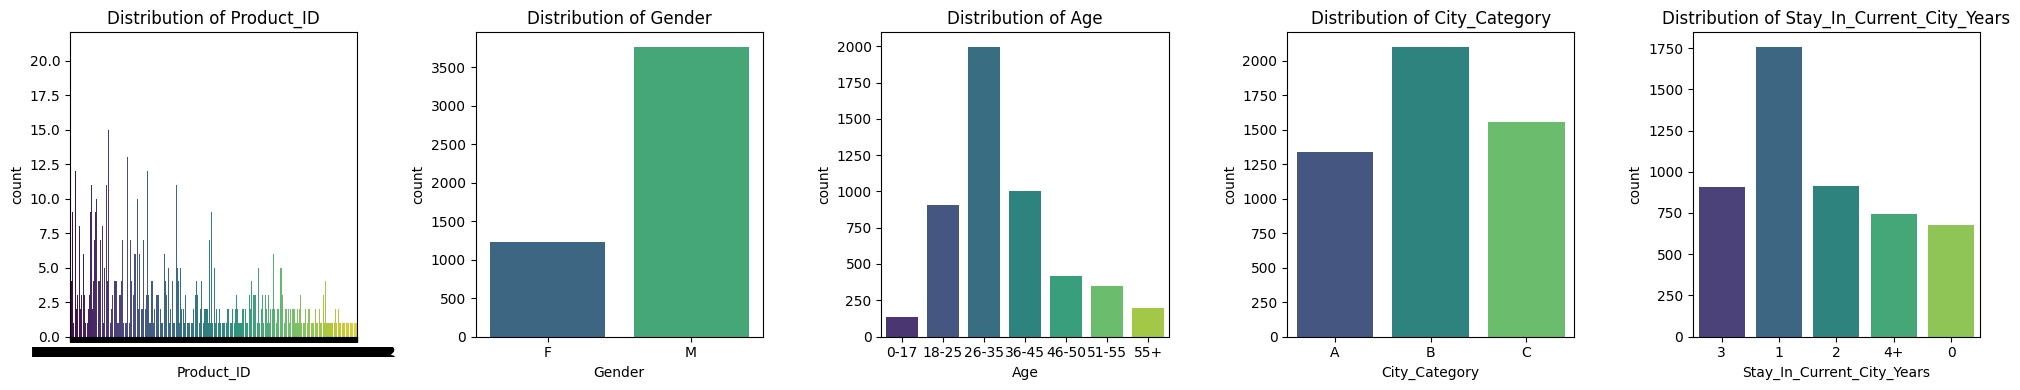

In [ ]:
#print(cat_col)
fig, axes = plt.subplots(nrows=1, ncols=len(cat_col), figsize=(20, 4))

for ax, category in zip(axes, cat_col):
    sns.countplot(x=category, data=df, ax=ax, hue=category, palette='viridis', legend=False)  # Assign x to hue
    ax.set_title(f'Distribution of {category}')
    #ax.tick_params(axis='x', rotation=90)
    #ax.get_legend().remove()  # Remove the legend to clean up each plot

plt.tight_layout()
plt.show()


In [ ]:
del_col = ['User_ID', 'Product_ID']
print("컬럼 제거 전 shape", df.shape)
df = df.drop(del_col, axis=1)
print("컬럼 제거 후 shape", df.shape)

컬럼 제거 전 shape (4998, 10)
컬럼 제거 후 shape (4998, 8)


각각 scaling 적용 [target값 제외]


In [ ]:
# cat_col
for each_col in df.select_dtypes(include = 'object').columns.tolist():
  label = LabelEncoder().fit(df[each_col])
  df[each_col] = label.transform(df[each_col])

# num_col
num_col = df.select_dtypes(exclude = 'object').columns.tolist()
num_col.remove('Purchase')
mm = MinMaxScaler().fit(df[num_col])
df[num_col] = mm.transform(df[num_col])

df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,0.0,0.0,0.5,0.0,0.75,0.0,0.210526,0.083556
1,0.0,0.0,0.5,0.0,0.25,0.0,0.315789,0.187029
2,0.0,0.0,0.5,0.0,0.25,0.0,0.000000,0.321464
3,0.0,0.0,0.5,0.0,0.75,0.0,0.052632,0.686862
4,0.0,0.0,0.5,0.0,0.75,0.0,0.105263,0.241297


Correlation 확인

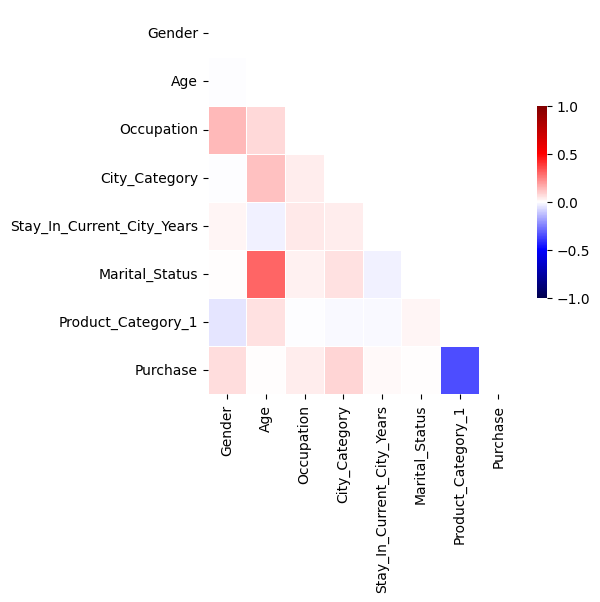

In [ ]:
df_corr = df[df.select_dtypes(exclude = 'object').columns.tolist()].corr()

# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(5,5) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df_corr, dtype= bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df_corr,
            cmap = 'seismic',
            annot = False,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.show()

## 2. KNN 구현 & 파라미터 튜닝

Train, Test split

In [ ]:
#train_test_split
X = df.drop('Purchase', axis =1)
y = df['Purchase']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((3498, 7), (1500, 7), (3498,), (1500,))

In [ ]:
param_grid = {'n_neighbors': list(range(1, 51)),
            "weights": ['uniform', 'distance'],
            'metric' : ['euclidean', 'manhattan', 'minkowski']}

knn = KNeighborsRegressor()
knn_model = GridSearchCV(knn, param_grid, cv=3, scoring='neg_mean_squared_error')
knn_model.fit(X_train, y_train)

best_k = knn_model.best_params_['n_neighbors']
best_score = -knn_model.best_score_ # Convert the score to positive as it returns negative MSE for easier maximization

print(f"The best value of k is {best_k} with a cross-validated MSE of {best_score:.2f}")

The best value of k is 15 with a cross-validated MSE of 0.04


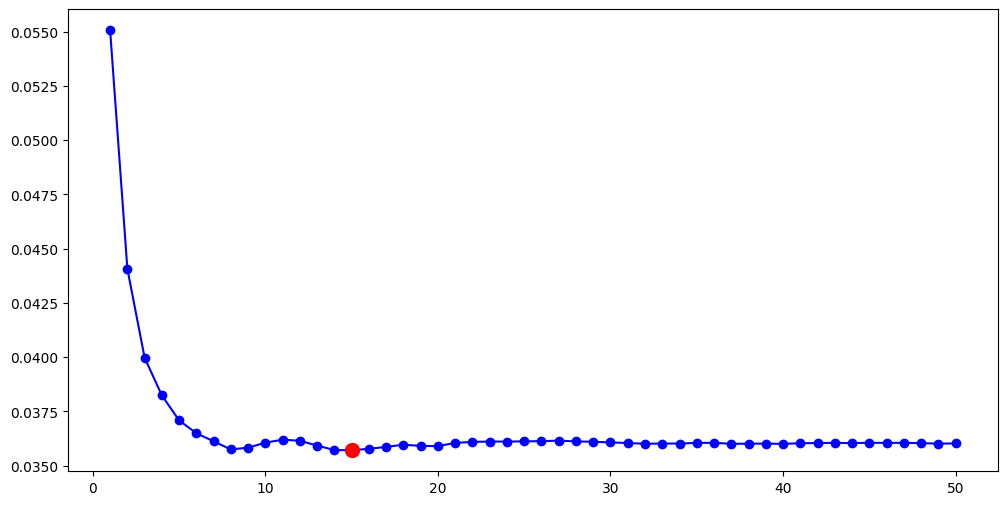

In [ ]:
param_list = list(knn_model.cv_results_['params']) # 모든 조합 리스트 생성
best_scores_per_k = np.zeros(len(param_grid['n_neighbors']))

# 파라미터 grid의 각각의 k iterate
for i, k in enumerate(param_grid['n_neighbors']):
    # 모든 조합에서 현재 k의 점수 찾기
    scores_for_k = []
    for j, params in enumerate(param_list):
        if params['n_neighbors'] == k:
            scores_for_k.append(-knn_model.cv_results_['mean_test_score'][j])
    # 현재 k의 최고점 등록
    best_scores_per_k[i] = min(scores_for_k)


plt.figure(figsize=(12, 6))
plt.plot(param_grid['n_neighbors'], best_scores_per_k, marker='o', linestyle='-', color='blue')
plt.plot(best_k, best_score, 'ro', markersize=10, label='Best k') # 강조

## 3. Evaluation

In [ ]:
y_pred_knn = knn_model.predict(X_val)

val_mse_knn = mean_squared_error(y_val, y_pred_knn)
val_rmse_knn = np.sqrt(val_mse_knn)

print(f"kNN validation MSE = {val_mse_knn:.2f}")
print(f"kNN validation RMSE = {val_rmse_knn:.2f}")

kNN validation MSE = 0.04
kNN validation RMSE = 0.19
